# Import tools - use qiime2-2021.11 kernel

In [1]:
import pandas as pd
%matplotlib inline
import qiime2
from qiime2 import Artifact
from tempfile import mkdtemp
from qiime2.plugins import demux, deblur, quality_filter, \
                           metadata, feature_table, alignment, \
                           phylogeny, diversity, emperor, feature_classifier, \
                           taxa, composition
from qiime2.plugins import fragment_insertion
from qiime2.plugins.fragment_insertion.methods import filter_features
from qiime2.plugins.feature_table.methods import filter_samples
from qiime2.plugins.feature_table.visualizers import summarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab
from scipy.optimize import curve_fit


## Set path

In [7]:
cd "/Users/Justin/Mycelium/UCSD/00_Knight_Lab/03_Extraction_test_12201/round_02/data/16S/09_filtered_data/"


/Users/Justin/Mycelium/UCSD/00_Knight_Lab/03_Extraction_test_12201/round_02/data/16S/09_filtered_data


## Filter feature-table to generate per-extraction plate tables

In [5]:
md = pd.read_csv('/Users/Justin/Mycelium/UCSD/00_Knight_Lab/03_Extraction_test_12201/round_02/sample_metadata/12201_metadata.txt',
                sep = '\t')


In [6]:
md.groupby(['round', 'extraction_kit']).size()


round  extraction_kit   
1      Homebrew             192
       MagMax Beta          192
       Norgen               192
       PowerSoil            207
       PowerSoil Pro        192
       Zymo MagBead         192
2      MagMAX Microbiome    192
       NucleoMag Food       192
       PowerSoil            192
       Zymo MagBead         192
3      MagMAX Microbiome    576
       PowerSoil            288
dtype: int64

In [ ]:
# Round 1 - Homebrew - high biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'Homebrew' AND biomass_plate = 'high'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_homebrew_high.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_homebrew_high.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_homebrew_high.qzv

# Round 1 - Homebrew - low biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'Homebrew' AND biomass_plate = 'low'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_homebrew_low.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_homebrew_low.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_homebrew_low.qzv


# Round 1 - MagMAX Beta - high biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'MagMax Beta' AND biomass_plate = 'high'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_magmaxBeta_high.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_magmaxBeta_high.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_magmaxBeta_high.qzv

# Round 1 - MagMAX Beta - low biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'MagMax Beta' AND biomass_plate = 'low'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_magmaxBeta_low.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_magmaxBeta_low.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_magmaxBeta_low.qzv


# Round 1 - Norgen - high biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'Norgen' AND biomass_plate = 'high'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_norgen_high.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_norgen_high.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_norgen_high.qzv

# Round 1 - Norgen - low biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'Norgen' AND biomass_plate = 'low'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_norgen_low.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_norgen_low.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_norgen_low.qzv


# Round 1 - PowerSoil - high biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "round = '1' AND extraction_kit = 'PowerSoil' AND biomass_plate = 'high'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_powersoil_high.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_powersoil_high.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_powersoil_high.qzv

# Round 1 - PowerSoil - low biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "round = '1' AND extraction_kit = 'PowerSoil' AND biomass_plate = 'low'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_powersoil_low.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_powersoil_low.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_powersoil_low.qzv


# Round 1 - PowerSoil Pro - high biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'PowerSoil Pro' AND biomass_plate = 'high'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_pro_high.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_pro_high.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_pro_high.qzv

# Round 1 - PowerSoil Pro - low biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'PowerSoil Pro' AND biomass_plate = 'low'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_pro_low.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_pro_low.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r1_pro_low.qzv


# Round 2 - MagMAX Microbiome - high biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'MagMAX Microbiome' AND biomass_plate = 'high'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_magmax_high.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_magmax_high.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_magmax_high.qzv

# Round 2 - MagMAX Microbiome - low biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'MagMAX Microbiome' AND biomass_plate = 'low'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_magmax_low.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_magmax_low.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_magmax_low.qzv


# Round 2 - Nucleomag Food - high biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'NucleoMag Food' AND biomass_plate = 'high'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_nucleomag_high.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_nucleomag_high.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_nucleomag_high.qzv

# Round 2 - Nucleomag Food - low biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'NucleoMag Food' AND biomass_plate = 'low'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_nucleomag_low.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_nucleomag_low.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_nucleomag_low.qzv


# Round 2 - PowerSoil - high biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "round = '2' AND extraction_kit = 'PowerSoil' AND biomass_plate = 'high'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_powersoil_high.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_powersoil_high.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_powersoil_high.qzv

# Round 2 - PowerSoil - low biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "round = '2' AND extraction_kit = 'PowerSoil' AND biomass_plate = 'low'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_powersoil_low.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_powersoil_low.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_powersoil_low.qzv


# Round 2 - Zymo MagBead - high biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'Zymo MagBead' AND biomass_plate = 'high'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_zymo_high.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_zymo_high.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_zymo_high.qzv

# Round 2 - Zymo MagBead - low biomass
qiime feature-table filter-samples \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/05_merged_data/dna_all_16S_deblur_biom.qza \
  --m-metadata-file /projects/dna_extraction_12201/round_02_six_kit_comparison/sample_metadata/12201_metadata.txt \
  --p-where "extraction_kit = 'Zymo MagBead' AND biomass_plate = 'low'" \
  --o-filtered-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_zymo_low.qza

qiime feature-table summarize \
  --i-table /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_zymo_low.qza \
  --o-visualization /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/09_filtered_data/dna_all_16S_deblur_biom_r2_zymo_low.qzv


## Import data

In [9]:
# Import feature tables and taxonomy file
table_r1_homebrew_high = Artifact.load('dna_all_16S_deblur_biom_r1_homebrew_high.qza')
table_r1_homebrew_low = Artifact.load('dna_all_16S_deblur_biom_r1_homebrew_low.qza')

table_r1_magmaxBeta_high = Artifact.load('dna_all_16S_deblur_biom_r1_magmaxBeta_high.qza')
table_r1_magmaxBeta_low = Artifact.load('dna_all_16S_deblur_biom_r1_magmaxBeta_low.qza')

table_r1_norgen_high = Artifact.load('dna_all_16S_deblur_biom_r1_norgen_high.qza')
table_r1_norgen_low = Artifact.load('dna_all_16S_deblur_biom_r1_norgen_low.qza')

table_r1_powersoil_high = Artifact.load('dna_all_16S_deblur_biom_r1_powersoil_high.qza')
table_r1_powersoil_low = Artifact.load('dna_all_16S_deblur_biom_r1_powersoil_low.qza')

table_r1_pro_high = Artifact.load('dna_all_16S_deblur_biom_r1_pro_high.qza')
table_r1_pro_low = Artifact.load('dna_all_16S_deblur_biom_r1_pro_low.qza')

table_r2_magmax_high = Artifact.load('dna_all_16S_deblur_biom_r2_magmax_high.qza')
table_r2_magmax_low = Artifact.load('dna_all_16S_deblur_biom_r2_magmax_low.qza')

table_r2_nucleomag_high = Artifact.load('dna_all_16S_deblur_biom_r2_nucleomag_high.qza')
table_r2_nucleomag_low = Artifact.load('dna_all_16S_deblur_biom_r2_nucleomag_low.qza')

table_r2_powersoil_high = Artifact.load('dna_all_16S_deblur_biom_r2_powersoil_high.qza')
table_r2_powersoil_low = Artifact.load('dna_all_16S_deblur_biom_r2_powersoil_low.qza')

table_r2_zymo_high = Artifact.load('dna_all_16S_deblur_biom_r2_zymo_high.qza')
table_r2_zymo_low = Artifact.load('dna_all_16S_deblur_biom_r2_zymo_low.qza')

taxonomy = Artifact.load('/Users/Justin/Mycelium/UCSD/00_Knight_Lab/03_Extraction_test_12201/round_02/data/16S/06_taxonomy/dna_all_16S_deblur_seqs_taxonomy_silva138.qza')


## Collapse and subset data
### NOTE: Set 'table' to one of the tables above

In [338]:
table = table_r2_zymo_low


In [339]:
# collapsed table to genus level
t6 = taxa.methods.collapse(table = table,
                           taxonomy = taxonomy,
                           level = 6)
# import collapsed table as pandas dataframe
df = t6.collapsed_table.view(pd.DataFrame)
# subset out Zymo mock community samples
zymo = df[df.index.str.contains('mock|mc')]
# ensure table values are numeric
zymo = zymo.astype(float)


In [340]:
# quick visual check that top 7 taxa make up most of the reads in highest input sample ("d1")
max_input = zymo[zymo.index.str.contains("d1")]
zymoT = max_input.T
zymoT.sort_values(zymoT.columns[0], ascending = False).head(10)


,12201.mock.community.d1.1.zymoMA.L,12201.mock.community.d1.3.zymoMA.L,12201.mock.community.d1.2.zymoMA.L
d__Bacteria;p__Desulfobacterota;c__Desulfuromonadia;o__Desulfuromonadia;f__Geoalkalibacteraceae;g__Geoalkalibacter,68.0,0.0,0.0
d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Propionibacteriales;f__Nocardioidaceae;g__Nocardioides,37.0,0.0,0.0
d__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus,15.0,4.0,2159.0
d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Geobacillus,12.0,9.0,0.0
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella,12.0,2.0,9129.0
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,7.0,6.0,0.0
d__Bacteria;p__Deinococcota;c__Deinococci;o__Thermales;f__Thermaceae;g__Thermus,7.0,0.0,0.0
d__Bacteria;p__Bacteroidota;c__Ignavibacteria;o__Ignavibacteriales;f__PHOS-HE36;g__PHOS-HE36,0.0,0.0,0.0
d__Bacteria;p__Firmicutes;c__Clostridia;o__Christensenellales;f__Christensenellaceae;g__Christensenellaceae_R-7_group,0.0,0.0,0.0
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Anaerocolumna,0.0,0.0,0.0


## Calculate reads aligning to mock community

In [341]:
# Calculate the total number of reads per sample
zymo['deblur_reads'] = zymo.sum(axis=1)

# Calculate the number of reads aligning to the mock community input genera
zymo['zymo_reads'] = zymo[['d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria',
                           'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas',
                           'd__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus',
                           'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;__',
                           'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella',
                           'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus',
                           'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus',
                           'd__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus']].sum(axis=1)

# Calculate the percent correctly assigned
zymo['correct_assign'] = zymo['zymo_reads'] / zymo['deblur_reads']


In [342]:
# subset out KatharoSeq columns and add in logarithim of reads for plotting
katharo = zymo[['correct_assign','deblur_reads','zymo_reads']]
katharo['log_deblur_reads'] = np.log10(katharo['deblur_reads'])


/var/folders/jd/pqrf4k_j2ps8404x4rfp8_500000gn/T/ipykernel_33473/930900228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  katharo['log_deblur_reads'] = np.log10(katharo['deblur_reads'])


## Fit an allosteric sigmoid curve for extrpolating min read count #

[   7.15598543 1187.9725539 ]


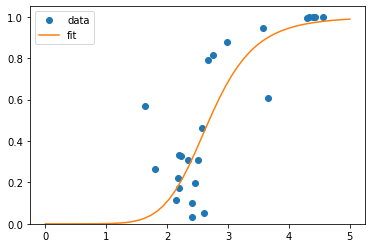

In [343]:
# define the allosteric sigmoid equation
def allosteric_sigmoid(x, h, k_prime):
    y = x ** h / (k_prime + x ** h)
    return y
 
# fit the curve to your data
popt, pcov = curve_fit(allosteric_sigmoid, katharo['log_deblur_reads'], katharo['correct_assign'], method='dogbox')
print(popt)
# plot fit curve
x = np.linspace(0, 5, 50)
y = allosteric_sigmoid(x, *popt)

# plot the fit
pylab.plot(katharo['log_deblur_reads'], katharo['correct_assign'], 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()


In [344]:
# assign variables and solve for X (number of reads to pass filter)
h = popt[0]  # first value printed above graph
k = popt[1]   # second value printed above graph
y = 0.5 ## what you want to solve for

min_log_reads = np.power((k/(1/y-1)),(1/h))
min_freq_50 = np.power(10, min_log_reads).astype(int)
min_freq_50


489

In [345]:
# assign variables and solve for X (number of reads to pass filter)
h = popt[0]  # first value printed above graph
k = popt[1]   # second value printed above graph
y = 0.8 ## what you want to solve for

min_log_reads = np.power((k/(1/y-1)),(1/h))
min_freq_80 = np.power(10, min_log_reads).astype(int)
min_freq_80


1838

In [346]:
# assign variables and solve for X (number of reads to pass filter)
h = popt[0]  # first value printed above graph
k = popt[1]   # second value printed above graph
y = 0.9 ## what you want to solve for

min_log_reads = np.power((k/(1/y-1)),(1/h))
min_freq_90 = np.power(10, min_log_reads).astype(int)
min_freq_90


4531

In [347]:
# assign variables and solve for X (number of reads to pass filter)
h = popt[0]  # first value printed above graph
k = popt[1]   # second value printed above graph
y = 0.95 ## what you want to solve for

min_log_reads = np.power((k/(1/y-1)),(1/h))
min_freq_95 = np.power(10, min_log_reads).astype(int)
min_freq_95


11445

## Remove samples with less than Katharoseq read limit

In [348]:
KS_table_50 = feature_table.methods.filter_samples(table = table,
                             min_frequency = min_freq_50)
df_50 = KS_table_50.filtered_table.view(pd.DataFrame)


In [349]:
KS_table_80 = feature_table.methods.filter_samples(table = table,
                             min_frequency = min_freq_80)
df_80 = KS_table_80.filtered_table.view(pd.DataFrame)


In [350]:
KS_table_90 = feature_table.methods.filter_samples(table = table,
                             min_frequency = min_freq_90)
df_90 = KS_table_90.filtered_table.view(pd.DataFrame)


In [351]:
KS_table_95 = feature_table.methods.filter_samples(table = table,
                             min_frequency = min_freq_95)
df_95 = KS_table_95.filtered_table.view(pd.DataFrame)


In [352]:
# import collapsed table as pandas dataframe
print("total samples =", len(df), "\n",
      "50% threshold,", len(df_50), "samples,", len(df_50)/len(df), "of total,", min_freq_50, "reads", "\n",
      "80% threshold,", len(df_80), "samples,", len(df_80)/len(df), "of total,", min_freq_80, "reads", "\n",
      "90% threshold,", len(df_90), "samples,", len(df_90)/len(df), "of total,", min_freq_90, "reads", "\n",
      "95% threshold,", len(df_95), "samples,", len(df_95)/len(df), "of total,", min_freq_95, "reads")


total samples = 96 
 50% threshold, 42 samples, 0.4375 of total, 489 reads 
 80% threshold, 32 samples, 0.3333333333333333 of total, 1838 reads 
 90% threshold, 22 samples, 0.22916666666666666 of total, 4531 reads 
 95% threshold, 10 samples, 0.10416666666666667 of total, 11445 reads


### Filter datasets based on 50% threshold read counts

In [ ]:
cd /projects/dna_extraction_12201/round_02_six_kit_comparison/data/16S/07_lod/


In [ ]:
# Homebrew (low-biomass 50% threshold = 1924)
qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r1_homebrew_high.qza \
  --p-min-frequency 1924 \
  --o-filtered-table dna_all_16S_deblur_biom_r1_homebrew_high_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r1_homebrew_high_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r1_homebrew_high_lod.qzv

qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r1_homebrew_low.qza \
  --p-min-frequency 1924 \
  --o-filtered-table dna_all_16S_deblur_biom_r1_homebrew_low_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r1_homebrew_low_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r1_homebrew_low_lod.qzv


In [ ]:
# MagMAX Beta (low-biomass 50% threshold = 223)
qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r1_magmaxBeta_high.qza \
  --p-min-frequency 223 \
  --o-filtered-table dna_all_16S_deblur_biom_r1_magmaxBeta_high_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r1_magmaxBeta_high_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r1_magmaxBeta_high_lod.qzv

qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r1_magmaxBeta_low.qza \
  --p-min-frequency 223 \
  --o-filtered-table dna_all_16S_deblur_biom_r1_magmaxBeta_low_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r1_magmaxBeta_low_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r1_magmaxBeta_low_lod.qzv


In [ ]:
# Norgen (low-biomass 50% threshold = 1960)
qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r1_norgen_high.qza \
  --p-min-frequency 1960 \
  --o-filtered-table dna_all_16S_deblur_biom_r1_norgen_high_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r1_norgen_high_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r1_norgen_high_lod.qzv

qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r1_norgen_low.qza \
  --p-min-frequency 1960 \
  --o-filtered-table dna_all_16S_deblur_biom_r1_norgen_low_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r1_norgen_low_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r1_norgen_low_lod.qzv


In [ ]:
# PowerSoil - Round 1 (low-biomass 50% threshold = 73)
qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r1_powersoil_high.qza \
  --p-min-frequency 73 \
  --o-filtered-table dna_all_16S_deblur_biom_r1_powersoil_high_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r1_powersoil_high_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r1_powersoil_high_lod.qzv

qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r1_powersoil_low.qza \
  --p-min-frequency 73 \
  --o-filtered-table dna_all_16S_deblur_biom_r1_powersoil_low_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r1_powersoil_low_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r1_powersoil_low_lod.qzv


In [ ]:
# PowerSoil Pro (low-biomass 50% threshold = 46)
qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r1_pro_high.qza \
  --p-min-frequency 46 \
  --o-filtered-table dna_all_16S_deblur_biom_r1_pro_high_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r1_pro_high_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r1_pro_high_lod.qzv

qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r1_pro_low.qza \
  --p-min-frequency 46 \
  --o-filtered-table dna_all_16S_deblur_biom_r1_pro_low_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r1_pro_low_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r1_pro_low_lod.qzv


In [ ]:
# MagMAX Microboime (low-biomass 50% threshold = 1286)
qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r2_magmax_high.qza \
  --p-min-frequency 1286 \
  --o-filtered-table dna_all_16S_deblur_biom_r2_magmax_high_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r2_magmax_high_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r2_magmax_high_lod.qzv

qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r2_magmax_low.qza \
  --p-min-frequency 1286 \
  --o-filtered-table dna_all_16S_deblur_biom_r2_magmax_low_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r2_magmax_low_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r2_magmax_low_lod.qzv


In [ ]:
# NucleoMag Food (low-biomass 50% threshold = 8379)
qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r2_nucleomag_high.qza \
  --p-min-frequency 8379 \
  --o-filtered-table dna_all_16S_deblur_biom_r2_nucleomag_high_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r2_nucleomag_high_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r2_nucleomag_high_lod.qzv

qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r2_nucleomag_low.qza \
  --p-min-frequency 8379 \
  --o-filtered-table dna_all_16S_deblur_biom_r2_nucleomag_low_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r2_nucleomag_low_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r2_nucleomag_low_lod.qzv


In [ ]:
# PowerSoil - Round 2 (low-biomass 50% threshold = 88)
qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r2_powersoil_high.qza \
  --p-min-frequency 88 \
  --o-filtered-table dna_all_16S_deblur_biom_r2_powersoil_high_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r2_powersoil_high_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r2_powersoil_high_lod.qzv

qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r2_powersoil_low.qza \
  --p-min-frequency 88 \
  --o-filtered-table dna_all_16S_deblur_biom_r2_powersoil_low_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r2_powersoil_low_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r2_powersoil_low_lod.qzv


In [ ]:
# Zymo MagBead (low-biomass 50% threshold = 489)
qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r2_zymo_high.qza \
  --p-min-frequency 489 \
  --o-filtered-table dna_all_16S_deblur_biom_r2_zymo_high_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r2_zymo_high_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r2_zymo_high_lod.qzv

qiime feature-table filter-samples \
  --i-table dna_all_16S_deblur_biom_r2_zymo_low.qza \
  --p-min-frequency 489 \
  --o-filtered-table dna_all_16S_deblur_biom_r2_zymo_low_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_r2_zymo_low_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_r2_zymo_low_lod.qzv


## Merge LOD tables

NOTE: Excluding MagMAX Beta kit as it is no longer relevant, PowerSoil from Round 1 as samples from Round 2 are non-different, and Homebrew because it performed poorly on non-stool samples

In [ ]:
qiime feature-table merge \
  --i-tables dna_all_16S_deblur_biom_r1_norgen_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r1_norgen_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r1_pro_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r1_pro_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_magmax_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_magmax_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_nucleomag_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_nucleomag_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_powersoil_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_powersoil_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_zymo_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_zymo_low_lod.qza \
  --o-merged-table dna_all_16S_deblur_biom_lod.qza

qiime feature-table summarize \
  --i-table dna_all_16S_deblur_biom_lod.qza \
  --o-visualization dna_all_16S_deblur_biom_lod.qzv

# There are 851 samples and 13316 features


Table including both PowerSoil sets for alpha-diversity analyses

In [ ]:
qiime feature-table merge \
  --i-tables dna_all_16S_deblur_biom_r1_powersoil_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r1_powersoil_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r1_norgen_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r1_norgen_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r1_pro_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r1_pro_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_magmax_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_magmax_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_nucleomag_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_nucleomag_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_powersoil_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_powersoil_low_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_zymo_high_lod.qza \
  --i-tables dna_all_16S_deblur_biom_r2_zymo_low_lod.qza \
  --o-merged-table dna_bothPS_16S_deblur_biom_lod.qza

qiime feature-table summarize \
  --i-table dna_bothPS_16S_deblur_biom_lod.qza \
  --o-visualization dna_bothPS_16S_deblur_biom_lod.qzv

# There are 1025 samples and 13723 features
